In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/UnsupervisedLearning/Clustering_gmm.csv")
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


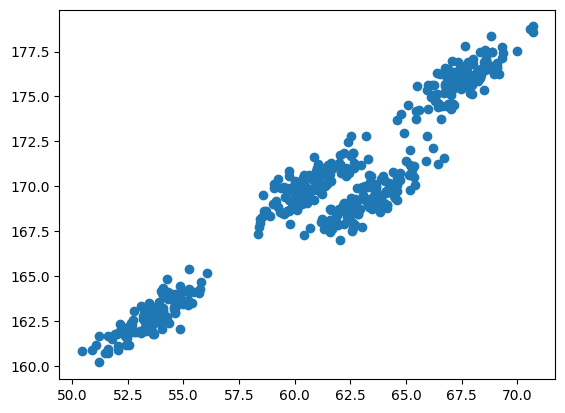

In [16]:
plt.scatter(df["Weight"],df["Height"])
plt.show()

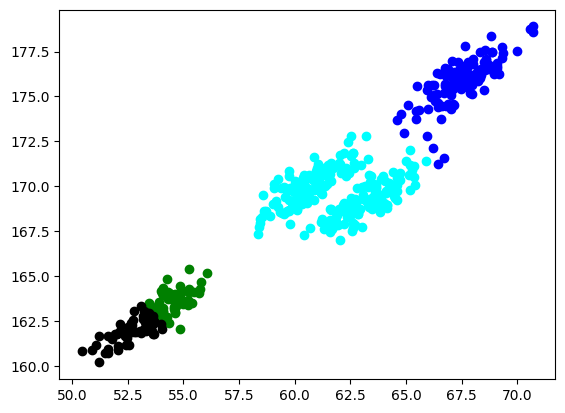

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)

pred = kmeans.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    df = frame[frame["cluster"]==k]
    plt.scatter(df["Weight"],df["Height"],c=color[k])
plt.show()

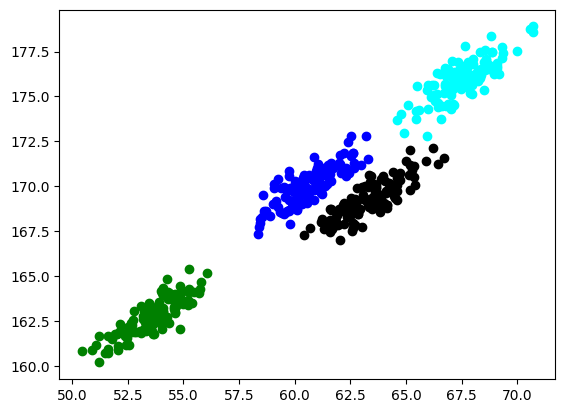

In [18]:
from sklearn.mixture import GaussianMixture
df = pd.read_csv("/content/drive/MyDrive/GraduateCourseAI/UnsupervisedLearning/Clustering_gmm.csv")

gmm = GaussianMixture(n_components=4)
gmm.fit(df)

labels = gmm.predict(df)
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    df = frame[frame["cluster"]==k]
    plt.scatter(df["Weight"],df["Height"],c=color[k])
plt.show()

In [35]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Utiliza yfinance para descargar datos del SPY desde 2000 hasta 2024 y calcula los retornos mensuales.
spy_data = yf.download('SPY', start='2000-01-01', end='2024-09-01')
spy_monthly_returns = spy_data['Close'].resample('M').ffill().pct_change().dropna()

# Se generan datos aleatorios para el CPI utilizando una distribución normal. El loc representa la media y el scale la desviación estándar.
# El CPI, o Índice de Precios al Consumidor (Consumer Price Index, en inglés),
# es un indicador económico que mide el cambio promedio en los precios que los consumidores pagan por una canasta de bienes y servicios a lo largo del tiempo.
np.random.seed(42)
dates = spy_monthly_returns.index
cpi_data = np.random.normal(loc=0.02, scale=0.01, size=len(dates))
cpi_monthly = pd.Series(cpi_data, index=dates)


[*********************100%***********************]  1 of 1 completed
<ipython-input-35-db0b1eb4e77b>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spy_monthly_returns = spy_data['Close'].resample('M').ffill().pct_change().dropna()


In [46]:
# Los datos del CPI y los retornos del SPY se combinan en un DataFrame y se eliminan las filas con valores nulos.
combined_data = pd.concat([cpi_monthly, spy_monthly_returns], axis=1).dropna()
combined_data.columns = ['CPI Inflation', 'Market Return']
combined_data.head()

,CPI Inflation,Market Return
Date,,
2000-02-29,0.024967,-0.015226
2000-03-31,0.018617,0.096915
2000-04-30,0.026477,-0.035120
2000-05-31,0.035230,-0.015723
2000-06-30,0.017658,0.019681


Número de iteraciones: 8


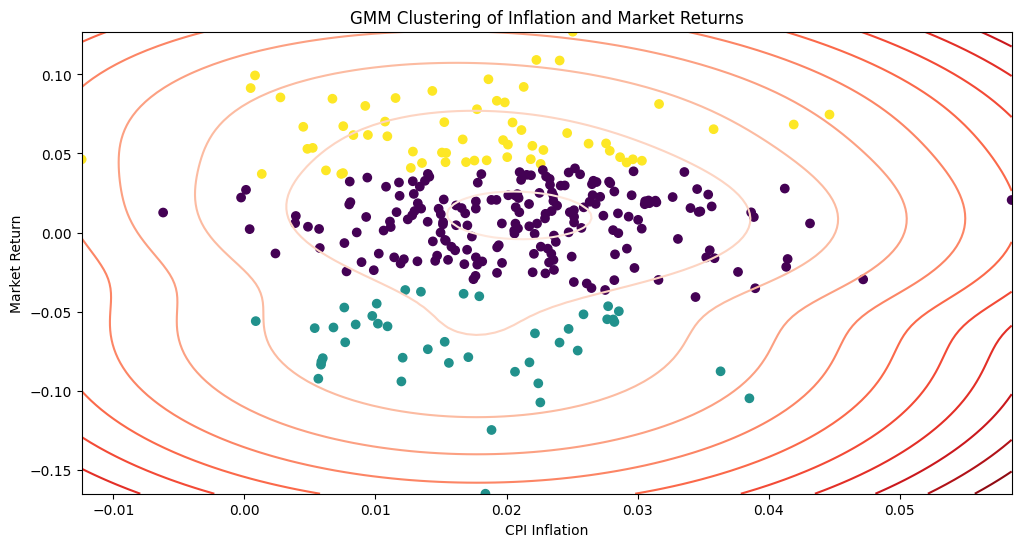

In [47]:
gmm_data = combined_data.to_numpy()

# Se ajusta un modelo de mezcla gaussiana a los datos combinados.
GMM = GaussianMixture(n_components=3).fit(gmm_data)
print('Número de iteraciones:', GMM.n_iter_)

# # Se crea una malla para visualizar los resultados del modelo GMM y se trazan los datos sobre el gráfico.
x, y = np.meshgrid(np.linspace(np.min(gmm_data[:, 0]), np.max(gmm_data[:, 0]), num=100),
                   np.linspace(np.min(gmm_data[:, 1]), np.max(gmm_data[:, 1]), num=100))
XY = np.array([x.flatten(), y.flatten()]).T

Z = -GMM.score_samples(XY)
Z = Z.reshape(x.shape)

plt.figure(figsize=(12, 6))
plt.contour(x, y, Z, levels=14, cmap='Reds')
plt.scatter(gmm_data[:, 0], gmm_data[:, 1], c=GMM.predict(gmm_data))
plt.xlabel('CPI Inflation')
plt.ylabel('Market Return')
plt.title('GMM Clustering of Inflation and Market Returns')
plt.show()

# relación entre la inflación del CPI y los retornos del mercado (SPY)
# Eje X (CPI Inflation): Representa la inflación medida por el Índice de Precios al Consumidor (CPI). Valores más altos en este eje indican mayor inflación.
# Eje Y (Market Return): Representa el retorno mensual del SPY. Valores más altos indican retornos positivos en el mercado.